In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vjtitask/sample_submission.csv
/kaggle/input/vjtitask/train.csv
/kaggle/input/vjtitask/test.csv


In [ ]:
-root-user-action

In [3]:
!pip install -q pyicu
!pip install -q pycld2
!pip install -q polyglot
!pip install -q textstat
!pip install -q googletrans


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 42.3 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re

import textstat
from scipy import stats
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
from kaggle_datasets import KaggleDatasets
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer  

import nltk
from textblob import TextBlob

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from googletrans import Translator
from nltk import WordNetLemmatizer
from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stopword=set(STOPWORDS)

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)


In [4]:
!pip install langdetect 
!pip install indic_transliteration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=89fc3aa841c08f513f341f785cb4f6df488997ae277d8863acf52ad7bb8a8ea3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.7 MB/s eta 0:00:00


In [5]:
from langdetect import detect
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate
from collections import Counter

# EDA! 
**visualizing and analysing the comments**

In [7]:
df=pd.read_csv("/kaggle/input/vjtitask/train.csv")
df2=pd.read_csv("/kaggle/input/vjtitask/test.csv")
df_sample=pd.read_csv("/kaggle/input/vjtitask/sample_submission.csv")


In [8]:
df

id                                               text  \
0      500796286320  Wow! From what I've observed from this documen...   
1      838906157157  काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...   
2     1011026626743  अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...   
3     1068853499446  She's saying that "doing her own research" led...   
4      502772748919  That is not Karen, that is perfectly reasonabl...   
...             ...                                                ...   
3995   815979127763  Why not just buy some oil platforms and start ...   
3996   426508330840  अरे भाई हे तर सगळे हिंदीत बोलतात आणि राहता महा...   
3997  1016442533101  सरकार ने जी योजना आणली आहे ती खरोखरच खूप चांगल...   
3998  1096741594952  मुख्यमंत्री एकनाथ शिंदे यांच्या नेतृत्वाखाली म...   
3999  1027635577738  सद्या फडणवीस जो बोलतोय तो केंद्राच्या भरवश्याव...   

      complaint  demands  praise  questions  
0           0.0      0.0     1.0        0.0  
1           1.0      0.0     0.0        0.0  
2           0.0      0.0     1.0        0.0  
3           1.0      0.0     0.0        0.0  
4           1.0      0.0     0.0        0.0  
...         ...      ...     ...        ...  
3995        0.0      0.0     0.0        1.0  
3996        1.0      0.0     0.0        0.0  
3997        1.0      0.0     0.0        0.0  
3998        0.0      0.0     1.0        0.0  
3999        1.0      0.0     0.0        0.0  

[4000 rows x 6 columns]

In [10]:
df2['language'].unique()

array(['Marathi', 'English', 'Hindi', 'Tagalog', 'Sinhala', 'Malayalam',
       'Galician', 'Gujarati', 'Norwegian Nynorsk'], dtype=object)

In [11]:
df['language'].unique()

array(['English', 'Marathi', 'Hindi', 'Urdu', 'Malayalam', 'Sinhala',
       'Uzbek', 'Afar', 'Persian', 'Czech', 'Southern Sotho', 'un',
       'Tagalog', 'Indonesian', 'Manx', 'Akan', 'Tamil',
       'Scottish Gaelic'], dtype=object)

In [12]:
#def is_hinglish(text):
    #hinglish_keywords = ['badiya','kya','kaise', 'bahut','raha']
    #for word in hinglish_keywords:
     #   if word in text.lower():
      #      return True
    #return False

#df1['language'] = df1.apply(lambda row: 'Hinglish' if is_hinglish(row['text']) else row['language'], axis=1)




In [ ]:
#df1[df1['language']=="Hinglish"]

In [13]:
import pandas as pd
import random


text_examples = {
    "demands": {
        "marathi": [
            "मी दोन दिवसांपूर्वी जो फ्रीज ऑर्डर केला होता, तो अजून आला नाही. कृपया याची माहिती द्या आणि त्वरित डिलिव्हरी करा.",
            "आमच्या बिलाचे पेंडिंग पेमेंट आहे का ते मला कळवा आणि शक्य तितक्या लवकर बिलाचे निवारण करा.",
            "तुमच्या बँकेचे नवीन होम लोनचे दर काय आहेत? मला घर खरेदीसाठी वित्तपुरवठा हवा आहे.",
            "ऑफिसमध्ये खूप उष्णता होत आहे, कृपया एसी दुरुस्त करा किंवा नवीन युनिट बसवा.",
            "माझ्या मोबाइल प्लॅनमध्ये इनक्लूडेड फ्री कॉल्स का चालत नाहीत? कृपया त्वरित ते चालू करा."
        ],
        "hindi": [
            "सरकारी योजनाओं की जानकारी गांव के हर व्यक्ति तक पहुँचाने के लिए मोबाइल ऐप लॉन्च करें, जिससे लोगों को समय पर जानकारी मिल सके।",
            "स्थानीय बाजारों में छोटे दुकानदारों के लिए किराए में छूट दी जाए। उनकी आय महामारी के कारण बुरी तरह प्रभावित हुई है।",
            "स्कूलों में पर्याप्त किताबें और शिक्षकों की नियुक्ति सुनिश्चित की जाए ताकि बच्चों को उचित शिक्षा मिल सके।"
        ],
        "english": [
            "I have been waiting for the furniture delivery for over two weeks now. Please provide an update and ensure it reaches this week.",
            "My internet connection has been down since yesterday evening. Kindly send a technician to fix it urgently.",
            "Can you please escalate my refund request? It’s been pending for over a month now.",
            "The air conditioning in the conference room is not working properly. Can you have it serviced before the next meeting?",
            "I need a detailed breakdown of the charges on my last invoice. Please send it to me today."
        ]
    },
    "questions": {
        "marathi": [
            "सरकारने नुकत्याच मंजूर केलेल्या कृषी विधेयकांचा शेतकऱ्यांच्या उत्पन्नावर कसा परिणाम होईल?",
            "सार्वजनिक वाहतूक व्यवस्था सुधारण्यासाठी स्थानिक प्रशासन कोणती धोरणे आखत आहे आणि त्याची अंमलबजावणी कधी होईल?",
            "ग्रामीण भागातील विद्यार्थ्यांना डिजिटल शिक्षण तंत्रज्ञान उपलब्ध करून देण्यासाठी कोणती पावले उचलली जातील?",
           "क्याआप बता सकते हैं कि मैंने पिछली बार जो कंप्लेंट दर्ज की थी, उस पर क्या एक्शन लिया गया?"
        ],
        "hindi": [
            "नई शिक्षा नीति से ग्रामीण बच्चों की शिक्षा में किस प्रकार के बदलाव देखने को मिलेंगे?",
            "सरकारी अस्पतालों में संसाधनों की कमी को पूरा करने के लिए कौन सी नई योजनाएँ लागू की जा रही हैं?",
            "क्या शहरी क्षेत्रों में पानी के संकट को हल करने के लिए दीर्घकालिक योजना बनाई जा रही है?"
        ],
        "english": [
            "Why is the warranty on the product void when I clearly followed the usage instructions",
            "Can you explain how the rewards points system works and how I can redeem them",
            "was the vibrator supposed to do that or i went overboard with it",
            "What are the steps involved in applying for a loan extension? Are there any additional charges?",
            "Can you provide some insight into why the delivery was delayed and what measures are being taken to prevent it in the future?"
        ]
    }
}


def add_generated_examples(df, text_examples):
    new_data = []
    
    id_start = max(df['id'].max(), 0) + 1 if not df.empty else 1

    for label, languages in text_examples.items():
        for lang, texts in languages.items():
            for text in texts:
                row = {
                    "id": id_start,
                    "text": text,
                    "praise": 0,
                    "demands": 1 if label == "demands" else 0,
                    "complaint": 0,
                    "questions": 1 if label == "questions" else 0
                }
                new_data.append(row)
                id_start += 1

    return pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)



df1 = add_generated_examples(df, text_examples)

# Display the updated dataframe
print(df1)


                 id                                               text  \
0      500796286320  Wow! From what I've observed from this documen...   
1      838906157157  काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...   
2     1011026626743  अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...   
3     1068853499446  She's saying that "doing her own research" led...   
4      502772748919  That is not Karen, that is perfectly reasonabl...   
...             ...                                                ...   
4020  1099483387540  Why is the warranty on the product void when I...   
4021  1099483387541  Can you explain how the rewards points system ...   
4022  1099483387542  was the vibrator supposed to do that or i went...   
4023  1099483387543  What are the steps involved in applying for a ...   
4024  1099483387544  Can you provide some insight into why the deli...   

      complaint  demands  praise  questions language  
0           0.0      0.0     1.0        0.0  English  
1

In [14]:
df1

id                                               text  \
0      500796286320  Wow! From what I've observed from this documen...   
1      838906157157  काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...   
2     1011026626743  अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...   
3     1068853499446  She's saying that "doing her own research" led...   
4      502772748919  That is not Karen, that is perfectly reasonabl...   
...             ...                                                ...   
4020  1099483387540  Why is the warranty on the product void when I...   
4021  1099483387541  Can you explain how the rewards points system ...   
4022  1099483387542  was the vibrator supposed to do that or i went...   
4023  1099483387543  What are the steps involved in applying for a ...   
4024  1099483387544  Can you provide some insight into why the deli...   

      complaint  demands  praise  questions language  
0           0.0      0.0     1.0        0.0  English  
1           1.0      0.0     0.0        0.0  Marathi  
2           0.0      0.0     1.0        0.0  Marathi  
3           1.0      0.0     0.0        0.0  English  
4           1.0      0.0     0.0        0.0  English  
...         ...      ...     ...        ...      ...  
4020        0.0      0.0     0.0        1.0      NaN  
4021        0.0      0.0     0.0        1.0      NaN  
4022        0.0      0.0     0.0        1.0      NaN  
4023        0.0      0.0     0.0        1.0      NaN  
4024        0.0      0.0     0.0        1.0      NaN  

[4025 rows x 7 columns]

In [15]:
stopwords = set(["the", "and", "to", "of", "a", "in", "for", "on", "with", "is", "this", "by", "an", "it", "was", "from", "as", "at", "be", "that"])  # Add more stopwords if needed

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stopwords])

df1['text'] = df1['text'].apply(remove_stopwords)

In [16]:
def get_language(text):
    return Detector("".join(x for x in text if x.isprintable()), quiet=True).languages[0].name

df1["language"] = df1["text"].progress_apply(get_language)
df
df2["language"]=df2["text"].progress_apply(get_language)

100%|██████████| 2000/2000 [00:00<00:00, 11833.82it/s]


In [17]:
df1

id                                               text  \
0      500796286320  Wow! From what I've observed documentary natio...   
1      838906157157  काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...   
2     1011026626743  अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...   
3     1068853499446  She's saying "doing her own research" led diff...   
4      502772748919  That not Karen, perfectly reasonable. She lost...   
...             ...                                                ...   
4020  1099483387540  Why warranty product void when I clearly follo...   
4021  1099483387541  Can you explain how rewards points system work...   
4022  1099483387542           vibrator supposed do or i went overboard   
4023  1099483387543  What are steps involved applying loan extensio...   
4024  1099483387544  Can you provide some insight into why delivery...   

      complaint  demands  praise  questions language  
0           0.0      0.0     1.0        0.0  English  
1           1.0      0.0     0.0        0.0  Marathi  
2           0.0      0.0     1.0        0.0  Marathi  
3           1.0      0.0     0.0        0.0  English  
4           1.0      0.0     0.0        0.0  English  
...         ...      ...     ...        ...      ...  
4020        0.0      0.0     0.0        1.0  English  
4021        0.0      0.0     0.0        1.0  English  
4022        0.0      0.0     0.0        1.0  English  
4023        0.0      0.0     0.0        1.0  English  
4024        0.0      0.0     0.0        1.0  English  

[4025 rows x 7 columns]

ENGLISH vs NON_ENGLISH

In [11]:
lang_list = sorted(list(set(df1["language"])))
counts = [list(df1["language"]).count(cont) for cont in lang_list]
df = pd.DataFrame(np.transpose([lang_list, counts]))
df.columns = ["Languages", "Count"]
df["Count"] = df["Count"].apply(int)

df_en = pd.DataFrame(np.transpose([["English", "Non-English"], [max(counts), sum(counts) - max(counts)]]))
df_en.columns = ["Languages", "Count"]

fig = px.bar(df_en, x="Languages", y="Count", title="Language of comments", color="Languages", text="Count")
fig.update_layout(template="plotly_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[0].textfont.color = "black"
fig.data[0].textposition = "outside"
fig.data[1].textfont.color = "black"
fig.data[1].textposition = "outside"
fig

In [12]:
fig = px.bar(df.query("Languages != 'English' and Languages != 'un'").query("Count >= 0"),
             y="Languages", x="Count", title="Language of non-English comments", template="plotly_white", color="Languages", text="Count", orientation="h")
fig.update_traces(marker=dict(line=dict(width=0.75,
                                        color='black')),  textposition="outside")
fig.update_layout(showlegend=False)
fig

In [13]:
lang_list = sorted(list(set(df2["language"])))
counts = [list(df2["language"]).count(cont) for cont in lang_list]
df = pd.DataFrame(np.transpose([lang_list, counts]))
df.columns = ["Languages", "Count"]
df["Count"] = df["Count"].apply(int)

df_en = pd.DataFrame(np.transpose([["English", "Non-English"], [max(counts), sum(counts) - max(counts)]]))
df_en.columns = ["Languages", "Count"]

fig = px.bar(df.query("Languages != 'English' and Languages != 'un'").query("Count >= 0"),
             y="Languages", x="Count", title="Language of non-English comments", template="plotly_white", color="Languages", text="Count", orientation="h")
fig.update_traces(marker=dict(line=dict(width=0.75,
                                        color='black')),  textposition="outside")
fig.update_layout(showlegend=False)
fig

**After looking through the data we can see that some texts listed has english language has some hinglish text containing hindi words written in english like kya bhadiya etc**

**looks like test set contains some data rows with languages that are not present in training set.... needs to handle this somehow**

In [14]:
def new_len(x):
    if type(x) is str:
        return len(x.split())
    else:
        return 0

df1["comment_words"] = df1["text"].apply(new_len)
nums = df1.query("comment_words != 0 and comment_words < 200").sample(frac=0.1)["comment_words"]
fig = ff.create_distplot(hist_data=[nums],
                         group_labels=["All comments"],
                         colors=["coral"])

fig.update_layout(title_text="Comment words", xaxis_title="Comment words", template="simple_white", showlegend=False)
fig.show()

**Visualization of most occuring words in all the four categories of classfication**

In [15]:
# Function to get all text for a specific category
def get_text_by_category(df, category_column):
    """
    Combine all the text data corresponding to a specific binary category column.
    """
    texts = df[df[category_column] == 1]['text'].values
    return " ".join(texts)

# Function to get frequent words
def get_frequent_words(text, top_n=20):
    """
    Get the top N frequent words from the text.
    """
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

def generate_word_cloud(text, category_name):
    """
    Generate and display a word cloud for a given category.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category_name}", fontsize=16)
    plt.show()
    
def plot_top_words(text, category_name, top_n=20):
    """
    Plot a bar chart of the most frequent words for a given category.
    """
    frequent_words = get_frequent_words(text, top_n=top_n)
    words, counts = zip(*frequent_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top {top_n} Words in {category_name}", fontsize=16)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()



Processing category: complaint


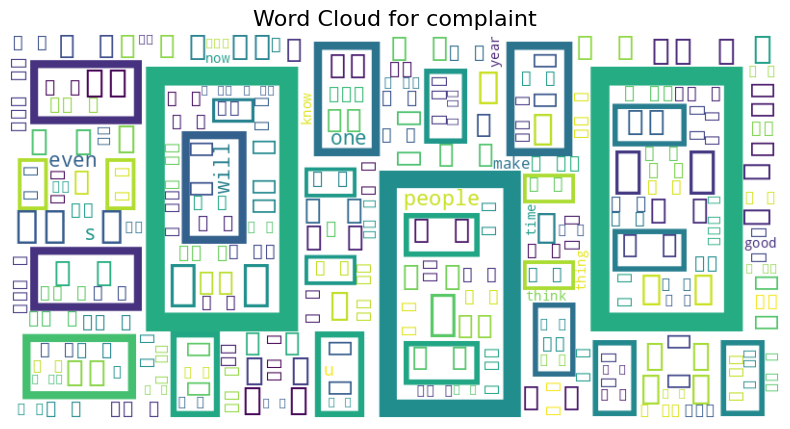

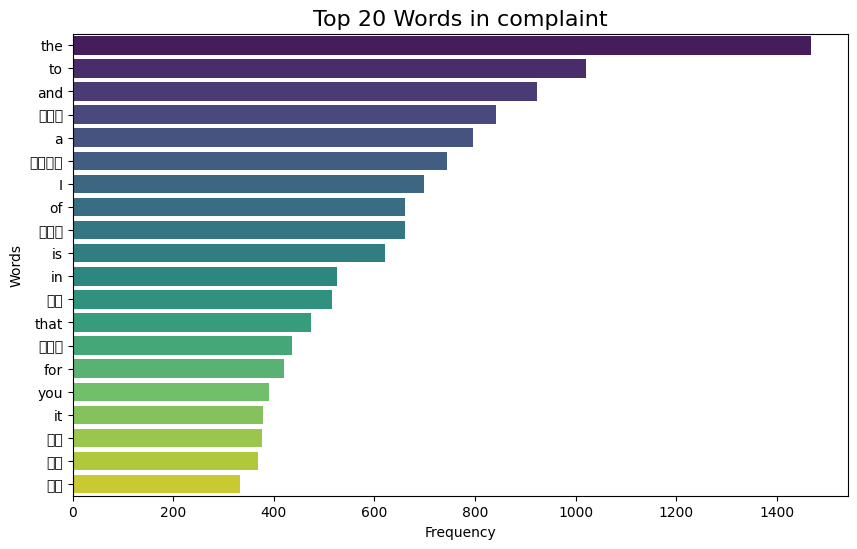

Processing category: demands


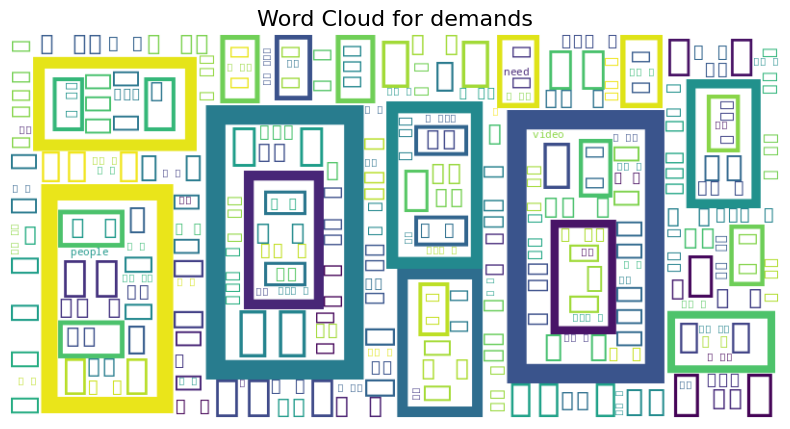

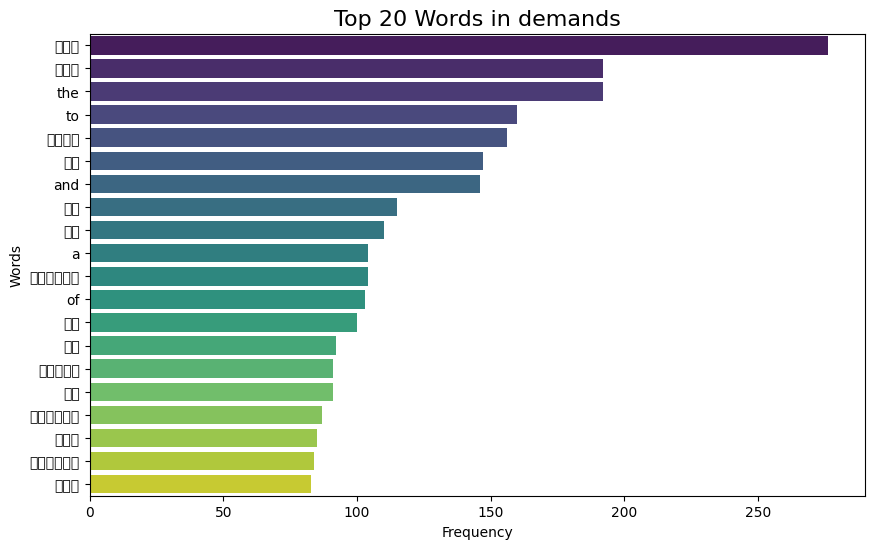

Processing category: praise


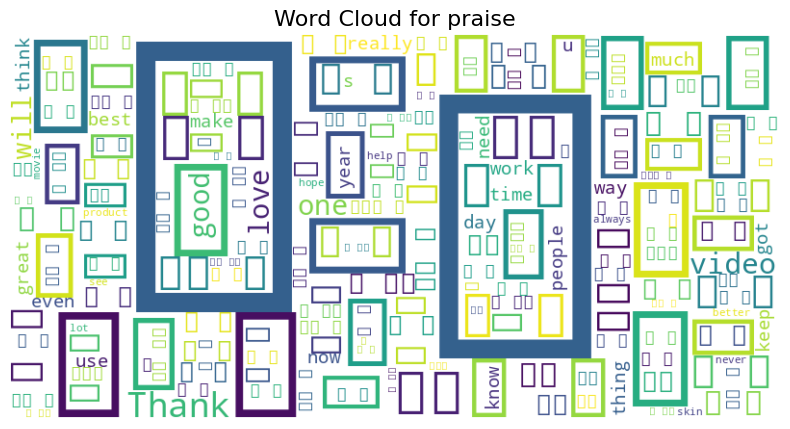

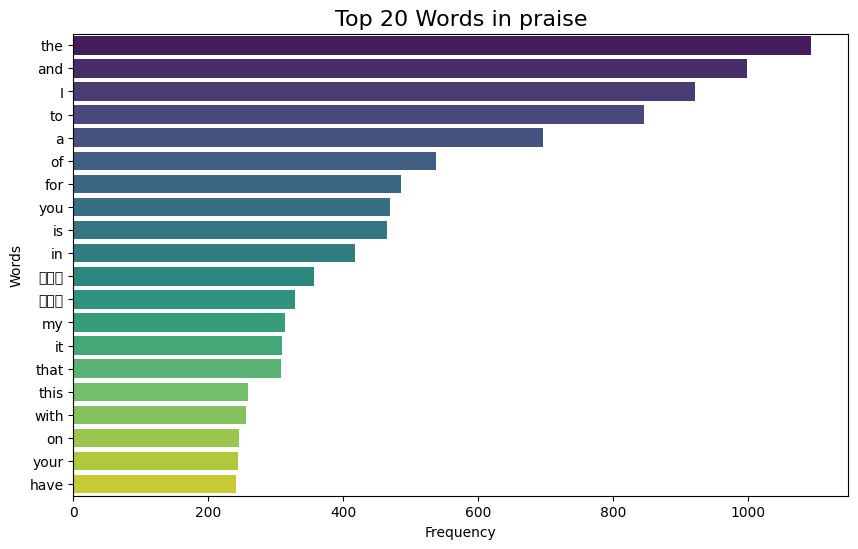

Processing category: questions


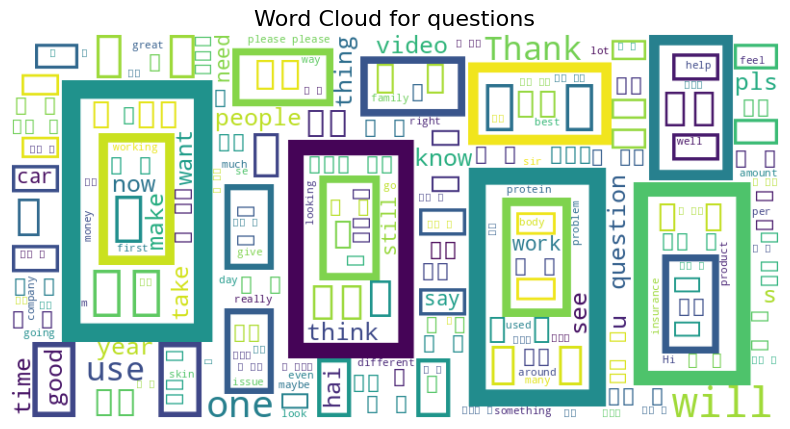

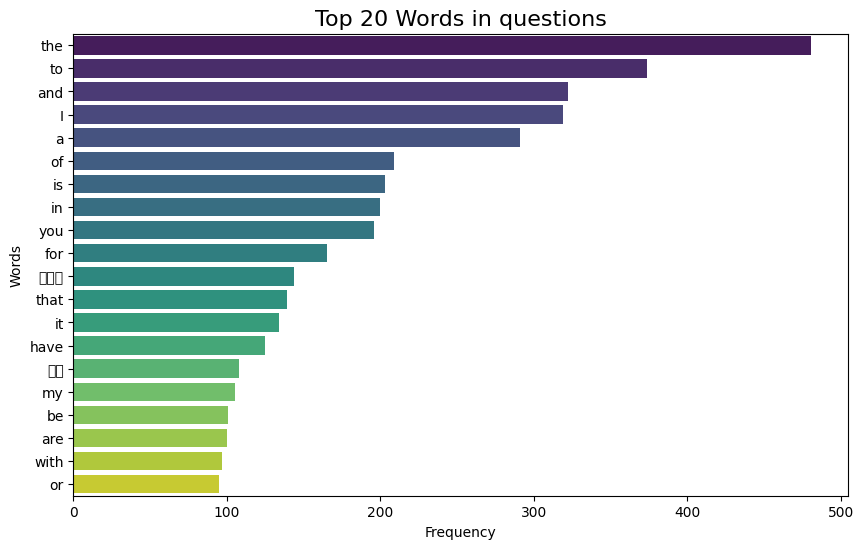

In [18]:
# List of category columns
category_columns = ['complaint','demands','praise','questions']

for category in category_columns:
    print(f"Processing category: {category}")
    
    # Get text for this category
    category_text = get_text_by_category(df1, category)
    
    # Generate Word Cloud
    generate_word_cloud(category_text, category)
    
    # Plot Top Words
    plot_top_words(category_text, category, top_n=20)


Category: complaint, Language: Urdu
Category: complaint, Language: Malayalam


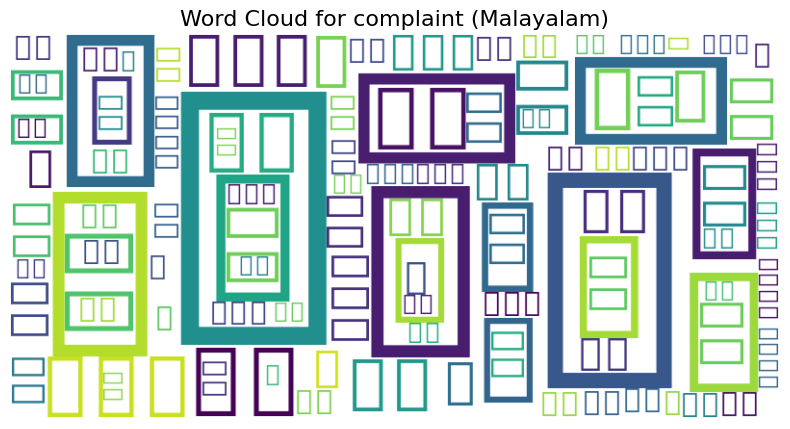

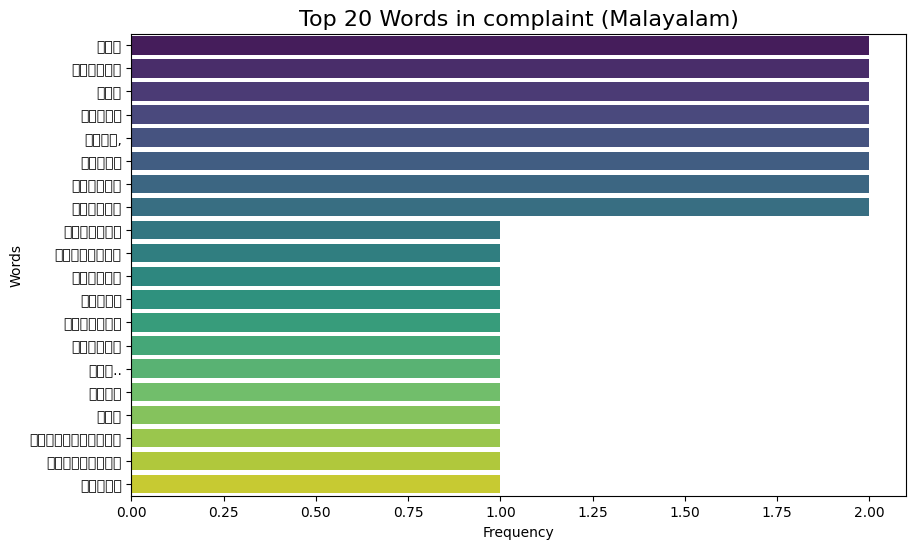

Category: complaint, Language: Sinhala
Category: complaint, Language: Uzbek


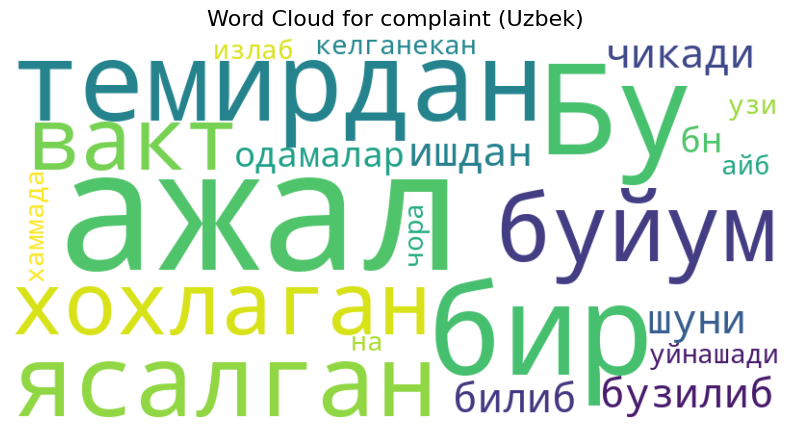

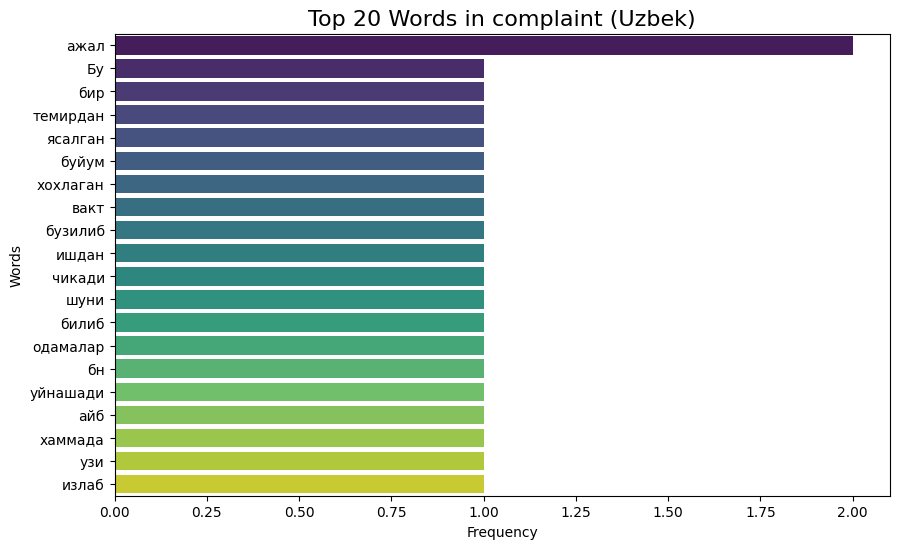

Category: complaint, Language: Afar


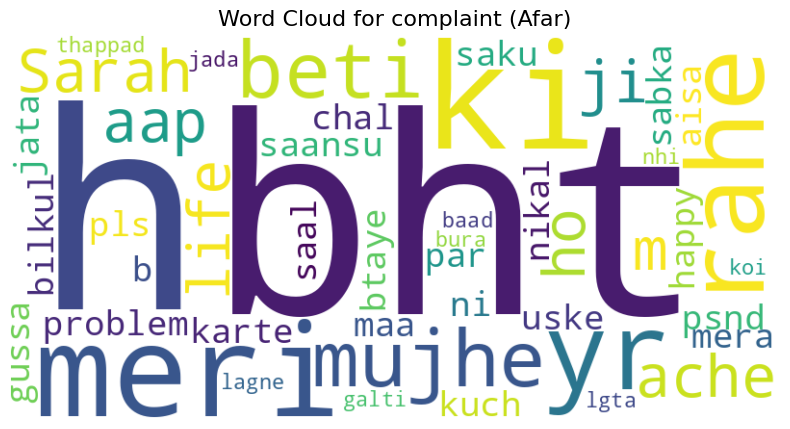

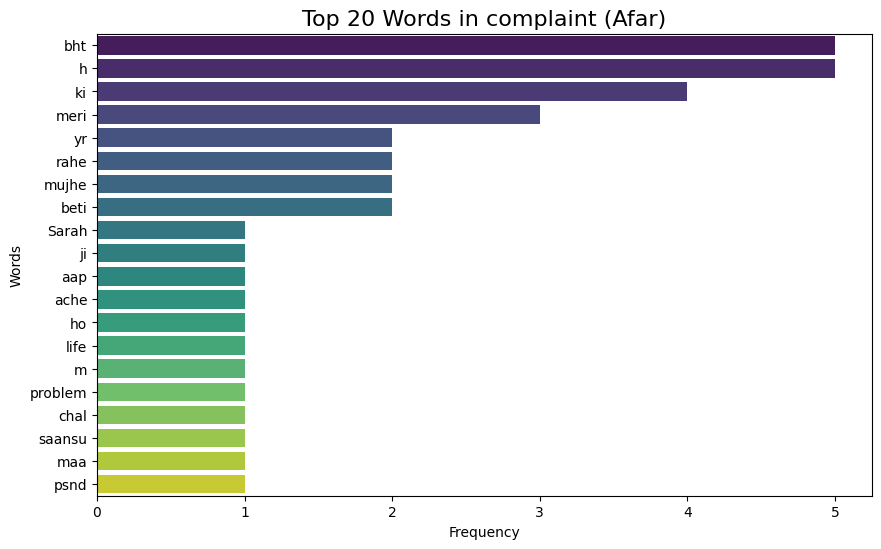

Category: complaint, Language: Persian


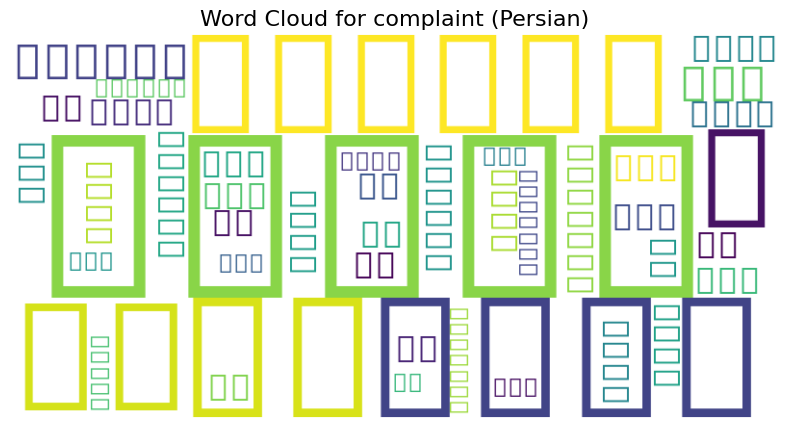

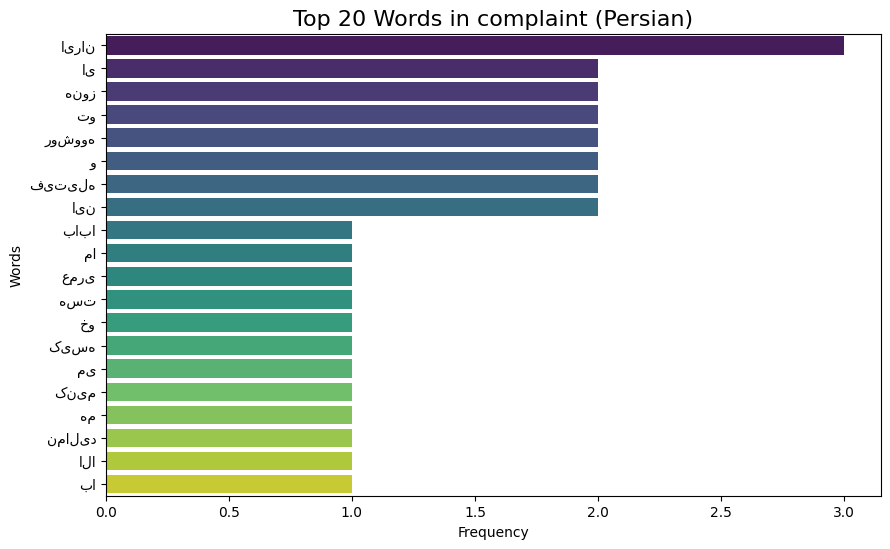

Category: complaint, Language: Czech
Category: complaint, Language: Southern Sotho
Category: complaint, Language: un
Category: complaint, Language: Tagalog


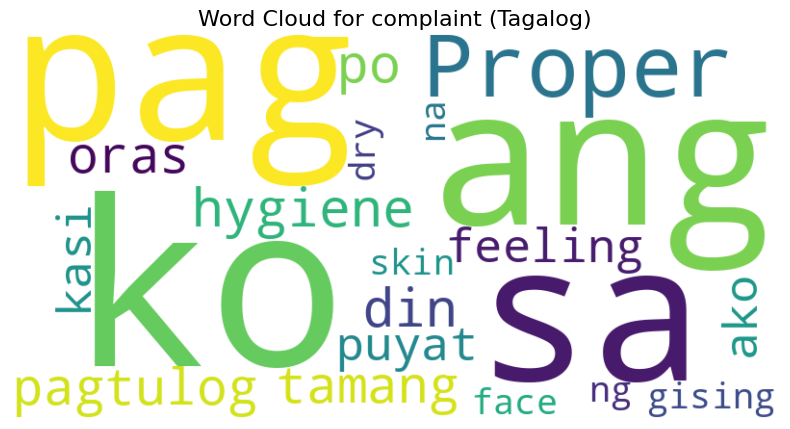

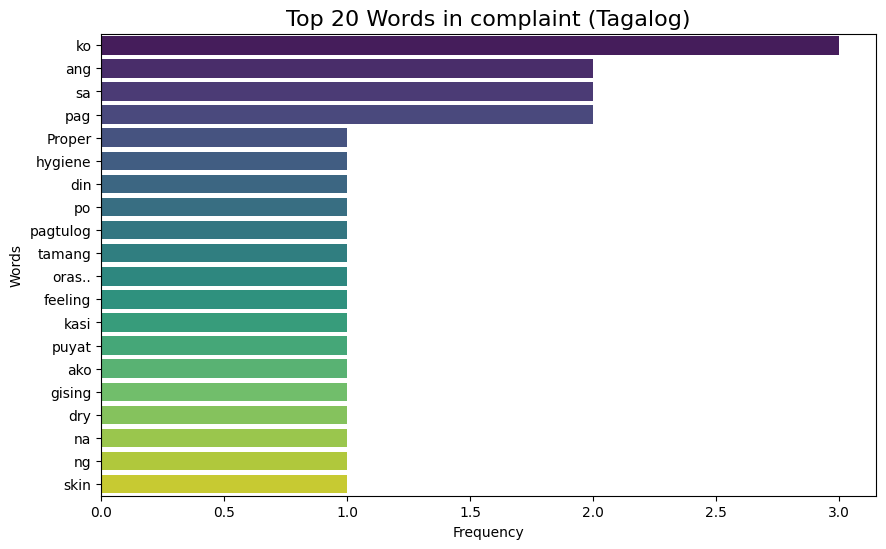

Category: complaint, Language: Indonesian


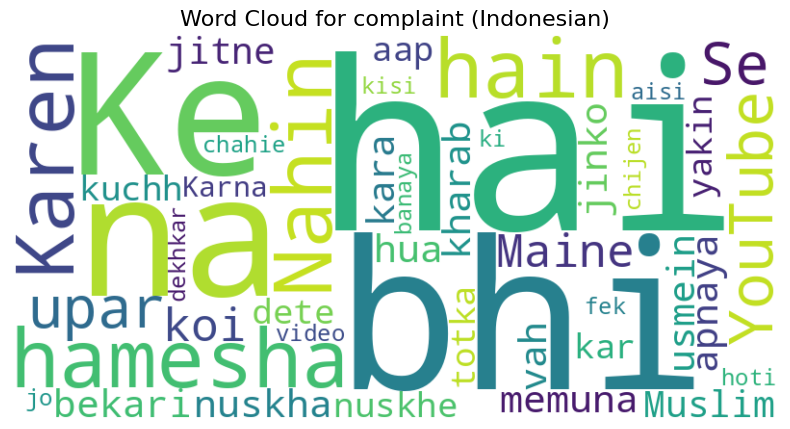

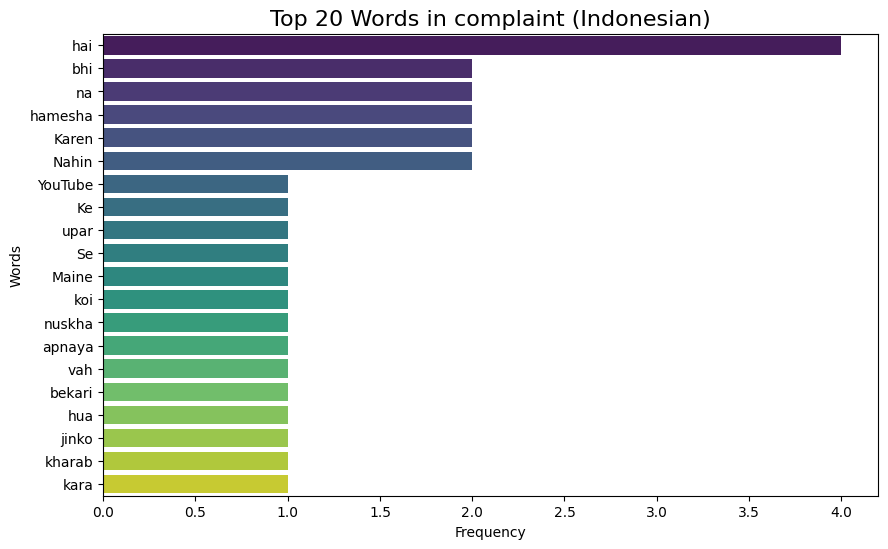

Category: complaint, Language: Manx
Category: complaint, Language: Akan
Category: complaint, Language: Tamil
Category: complaint, Language: Scottish Gaelic
Category: demands, Language: Urdu
Category: demands, Language: Malayalam


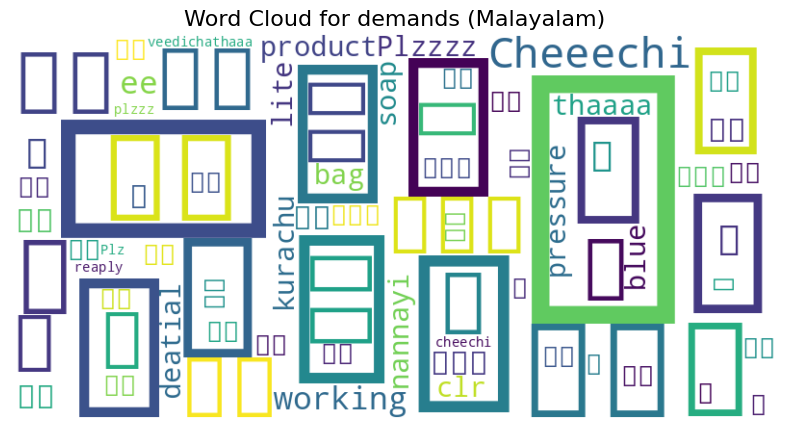

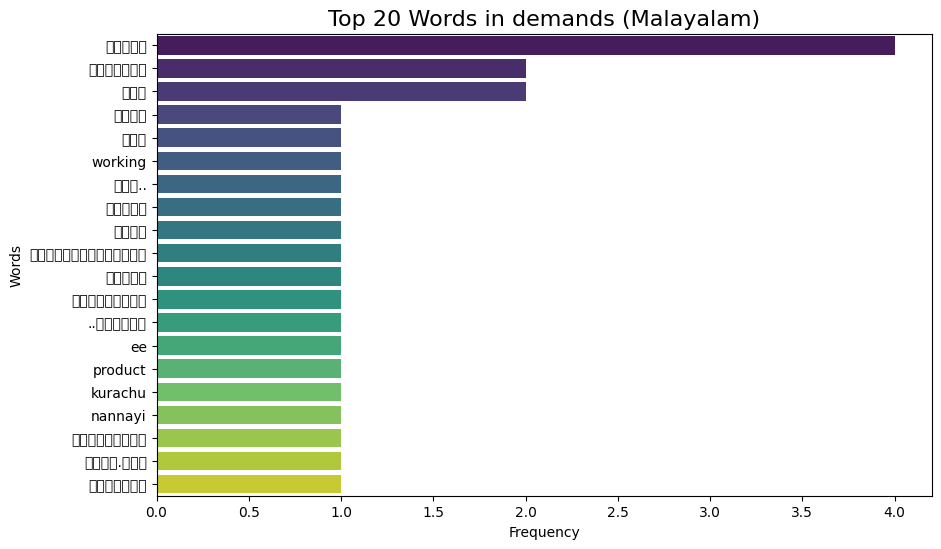

Category: demands, Language: Sinhala
Category: demands, Language: Uzbek
Category: demands, Language: Afar
Category: demands, Language: Persian
Category: demands, Language: Czech


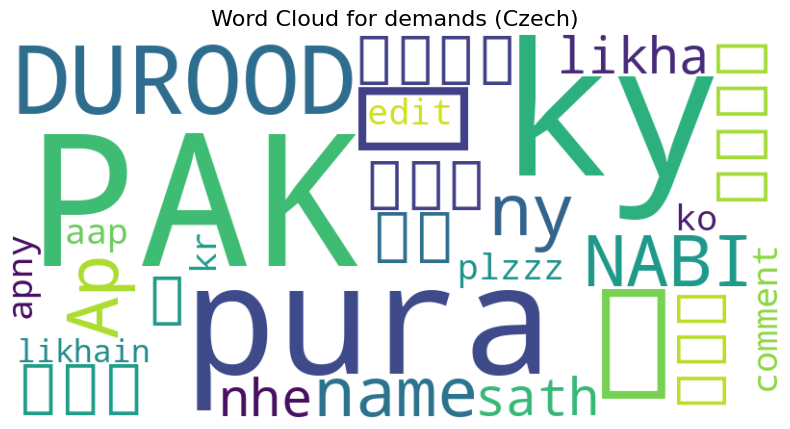

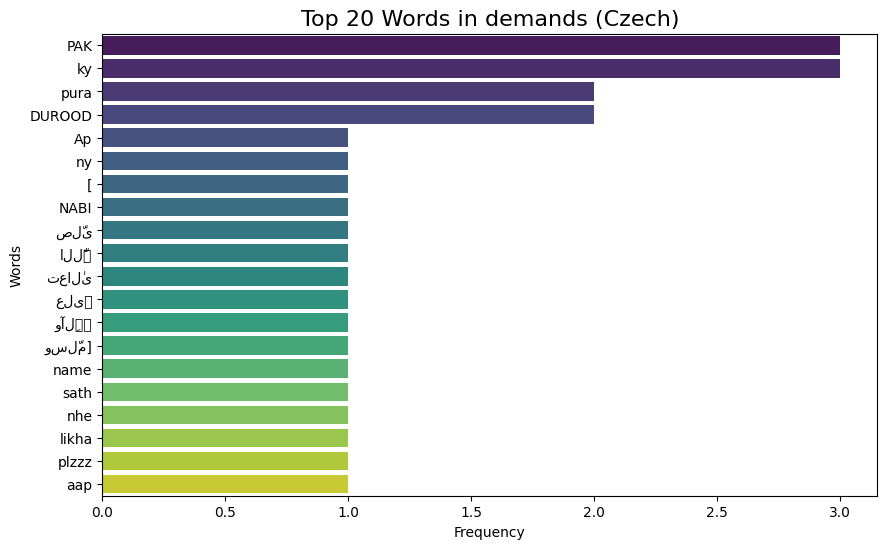

Category: demands, Language: Southern Sotho


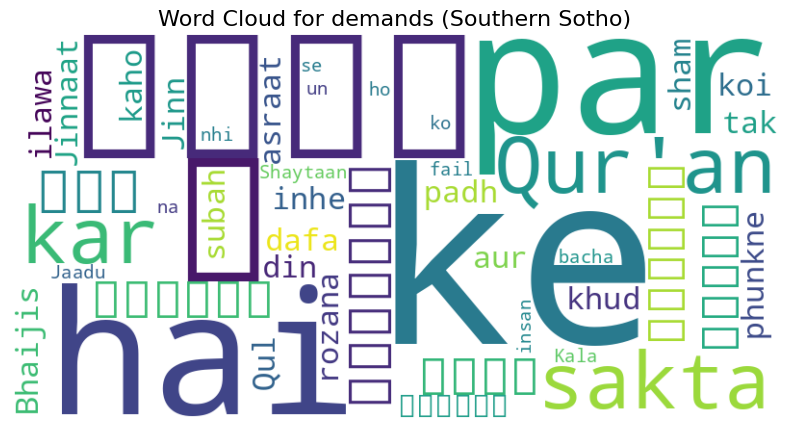

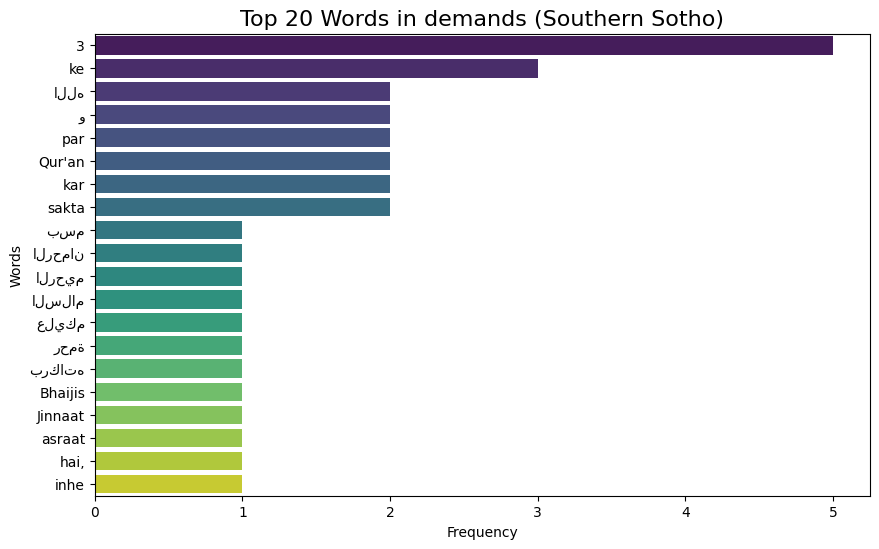

Category: demands, Language: un


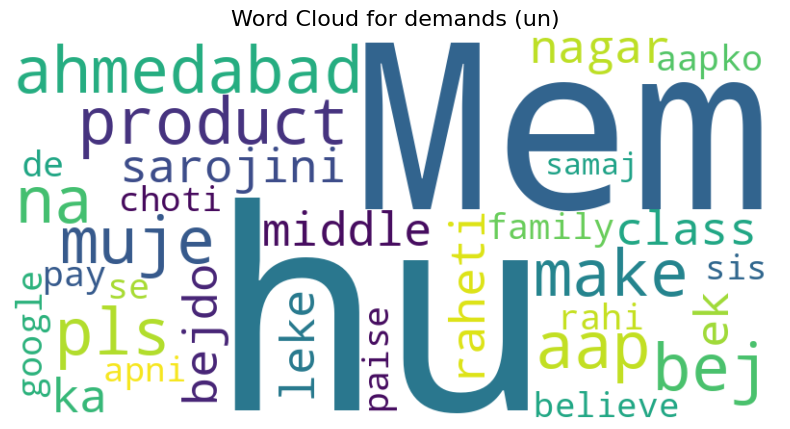

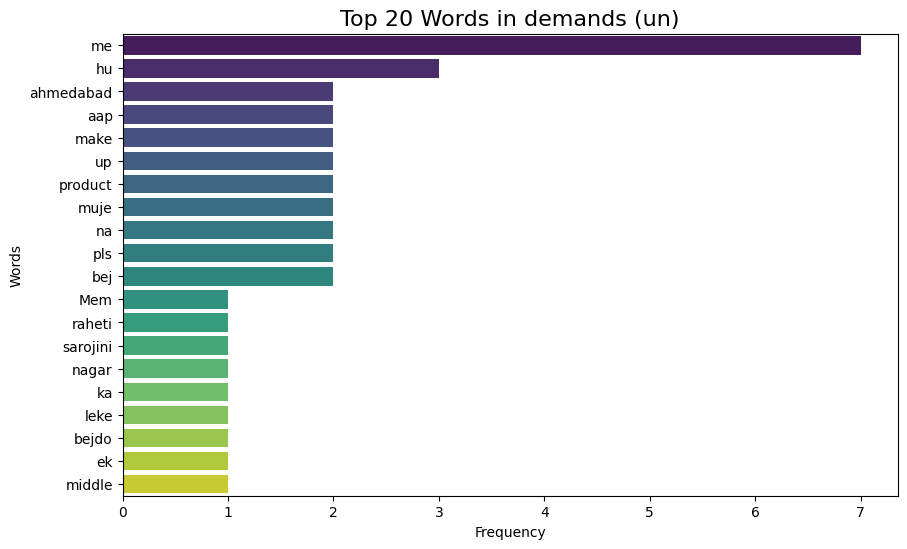

Category: demands, Language: Tagalog
Category: demands, Language: Indonesian
Category: demands, Language: Manx
Category: demands, Language: Akan
Category: demands, Language: Tamil
Category: demands, Language: Scottish Gaelic


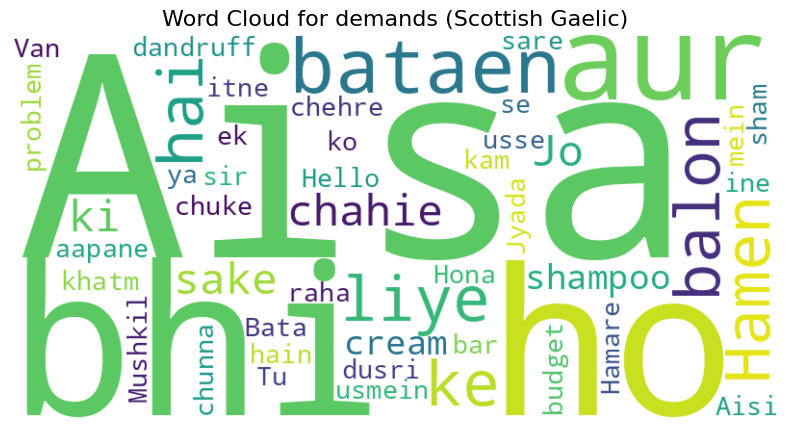

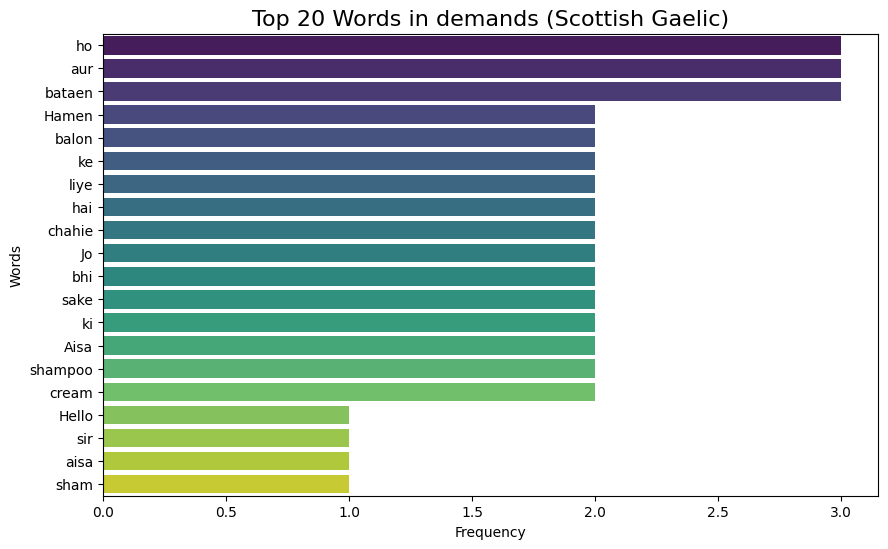

Category: praise, Language: Urdu


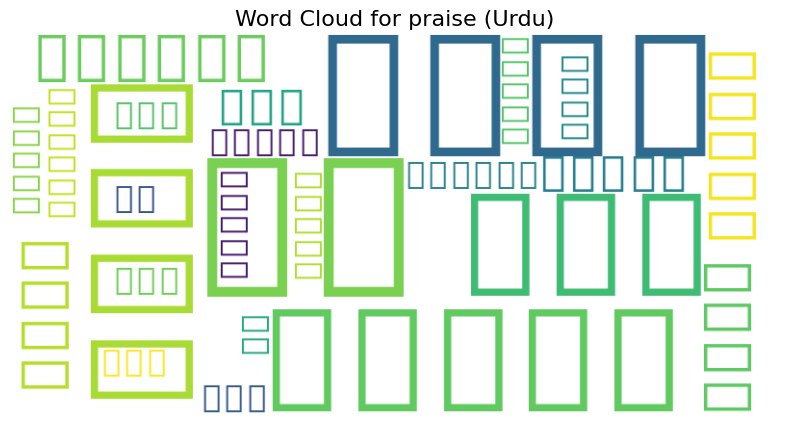

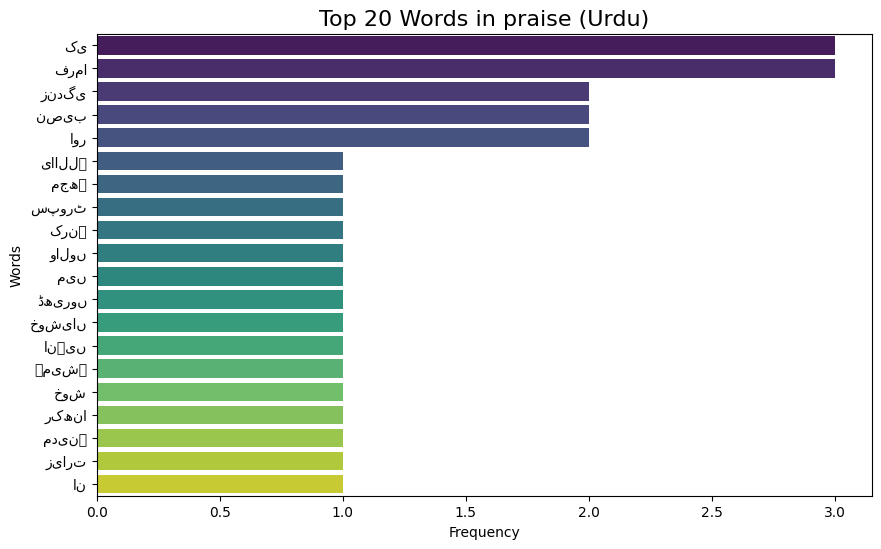

Category: praise, Language: Malayalam


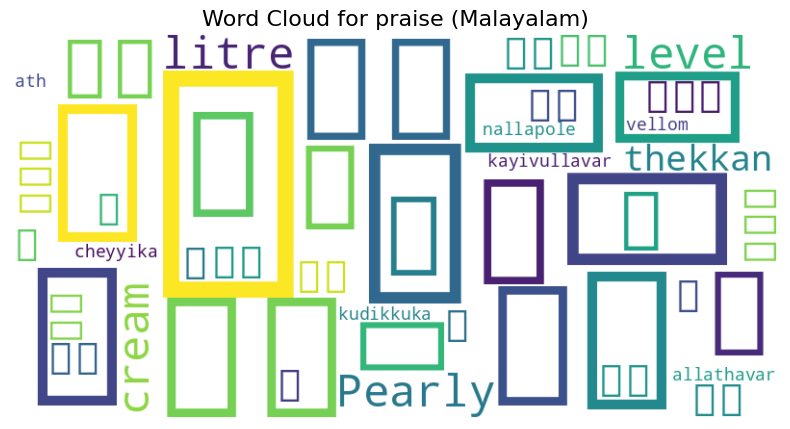

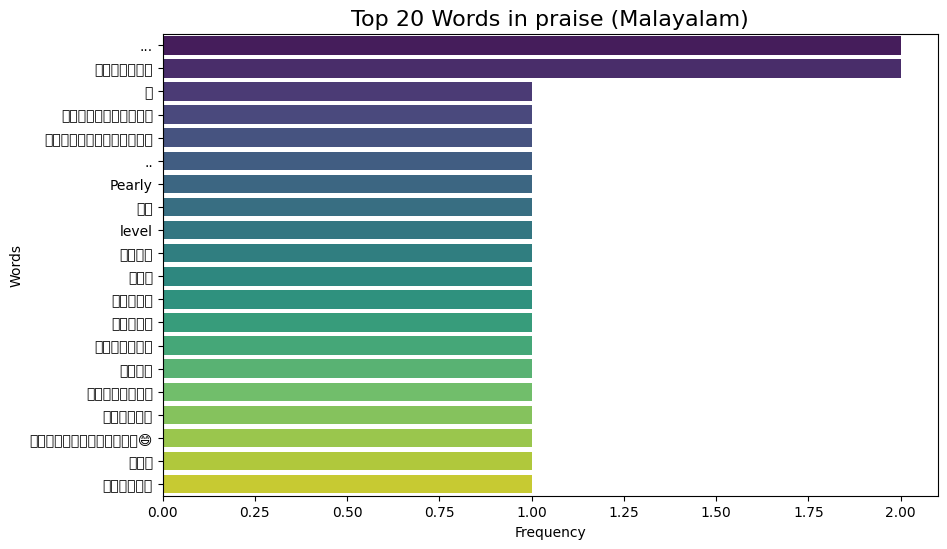

Category: praise, Language: Sinhala
Category: praise, Language: Uzbek
Category: praise, Language: Afar
Category: praise, Language: Persian
Category: praise, Language: Czech
Category: praise, Language: Southern Sotho
Category: praise, Language: un
Category: praise, Language: Tagalog


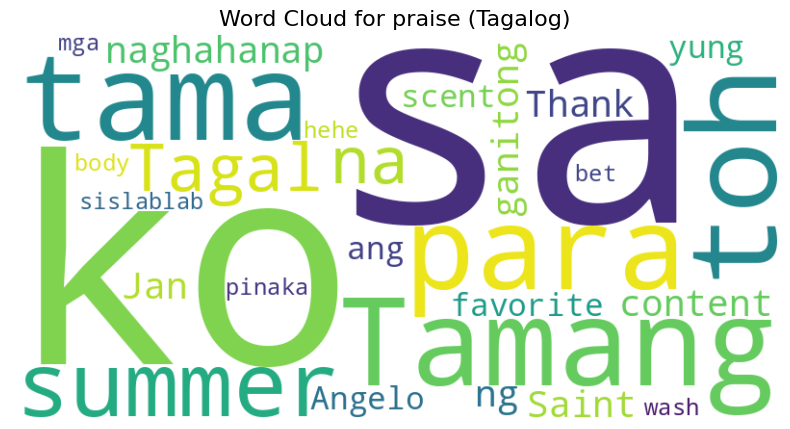

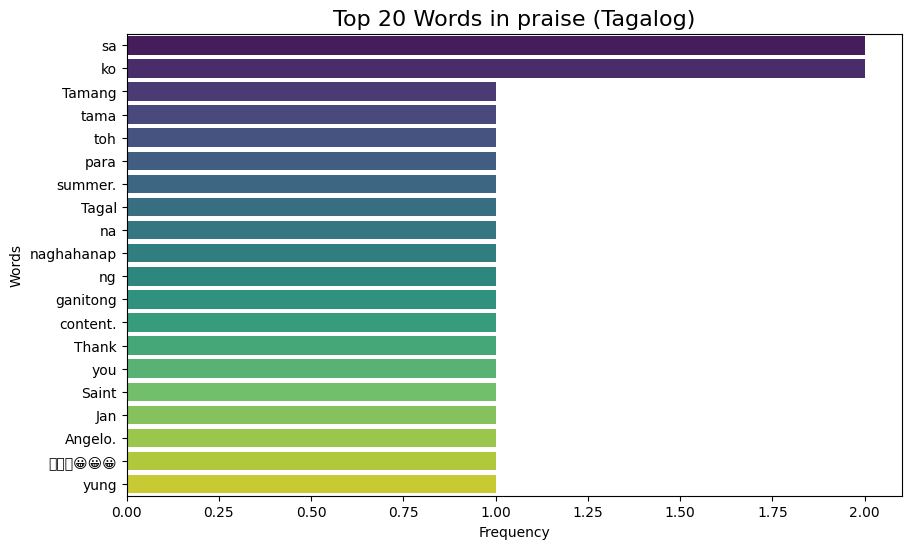

Category: praise, Language: Indonesian


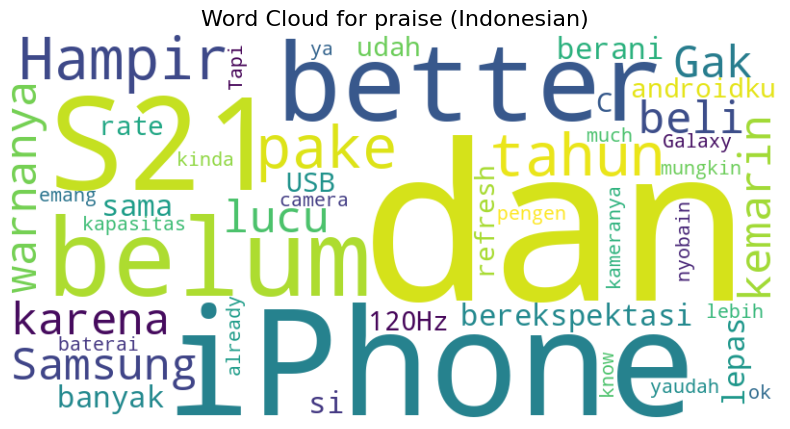

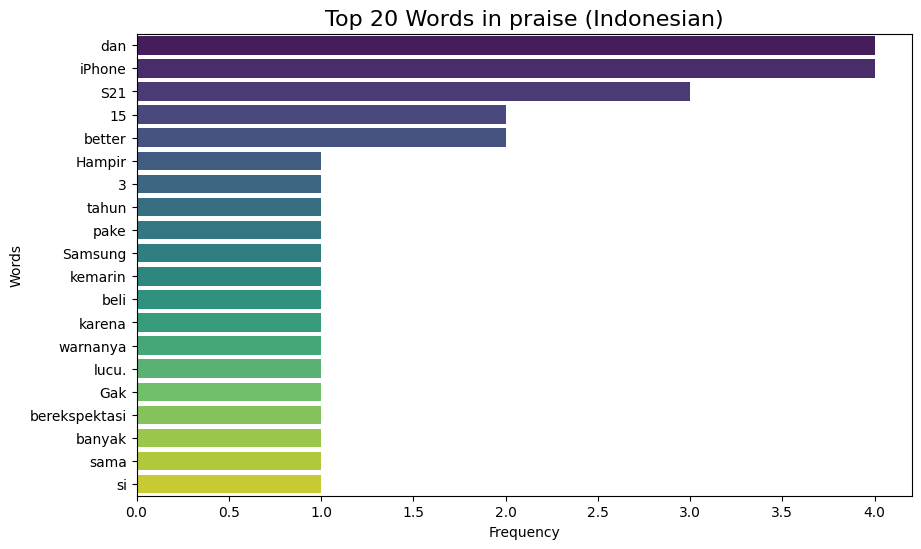

Category: praise, Language: Manx


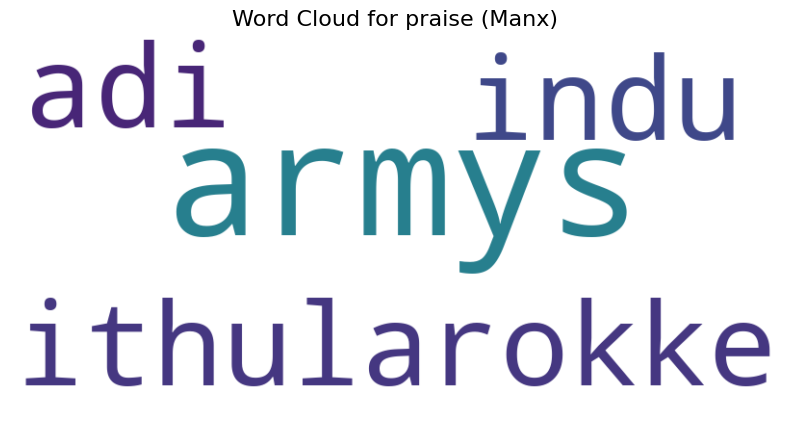

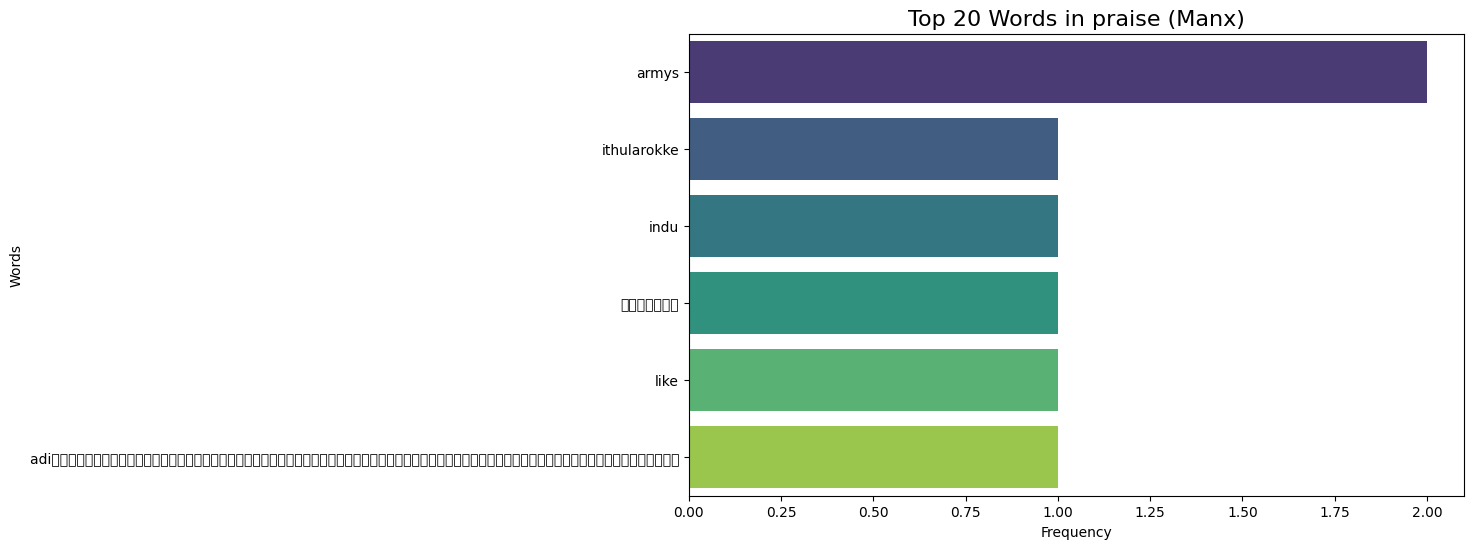

Category: praise, Language: Akan
Category: praise, Language: Tamil


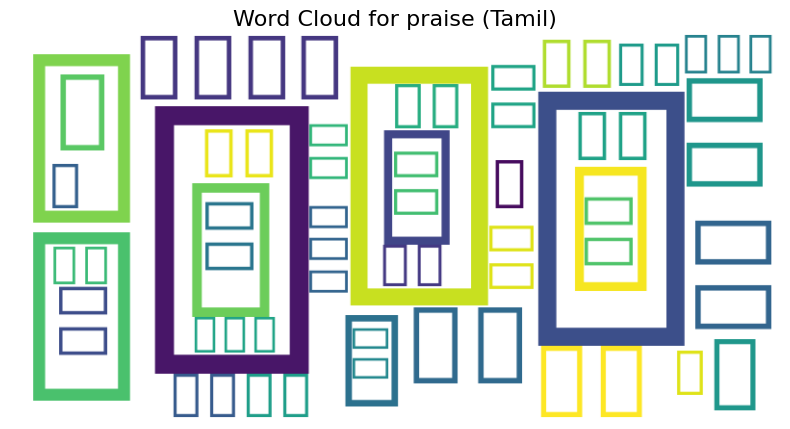

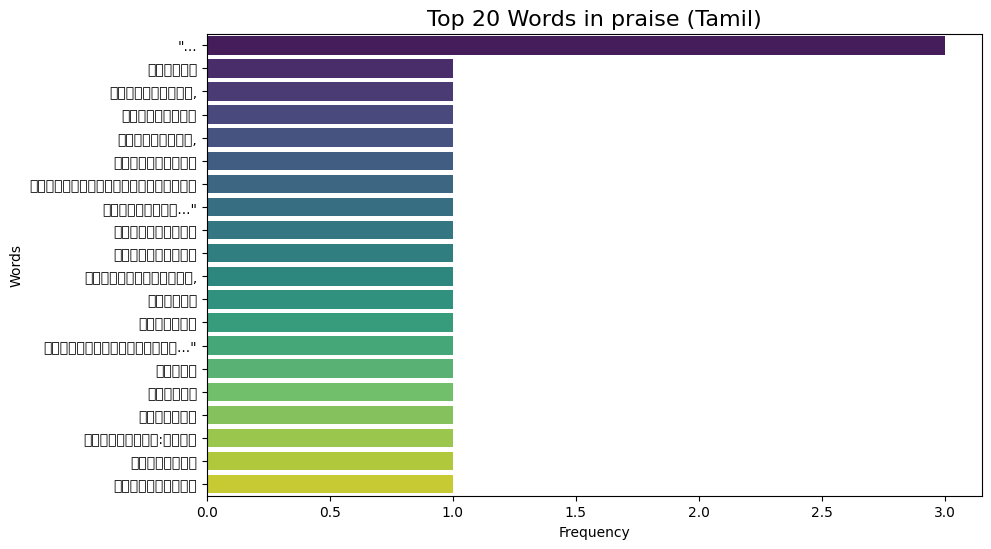

Category: praise, Language: Scottish Gaelic
Category: questions, Language: Urdu
Category: questions, Language: Malayalam
Category: questions, Language: Sinhala


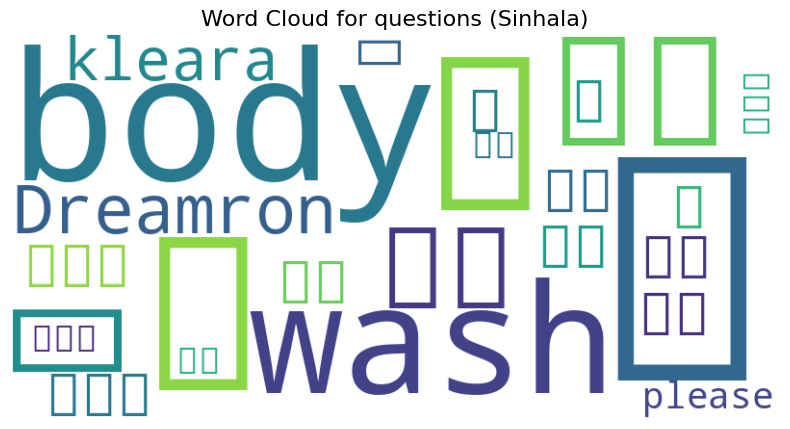

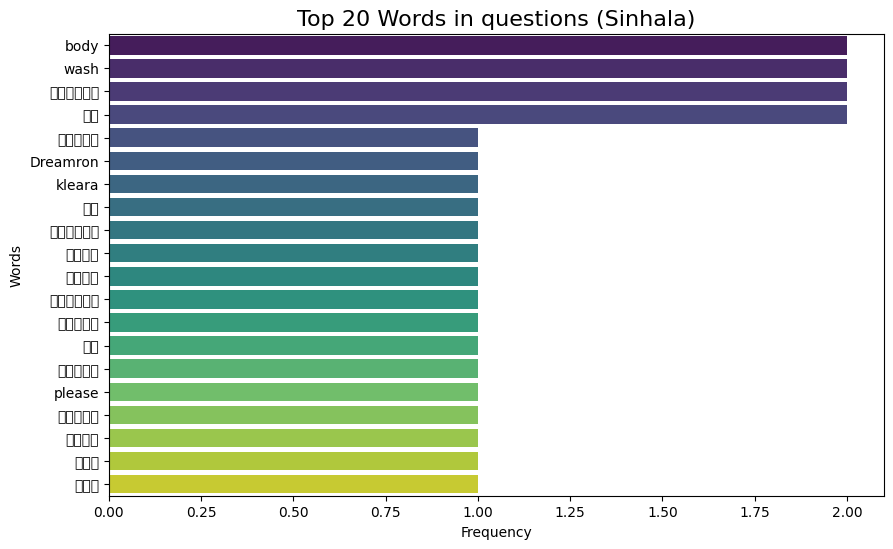

Category: questions, Language: Uzbek
Category: questions, Language: Afar
Category: questions, Language: Persian
Category: questions, Language: Czech
Category: questions, Language: Southern Sotho
Category: questions, Language: un
Category: questions, Language: Tagalog


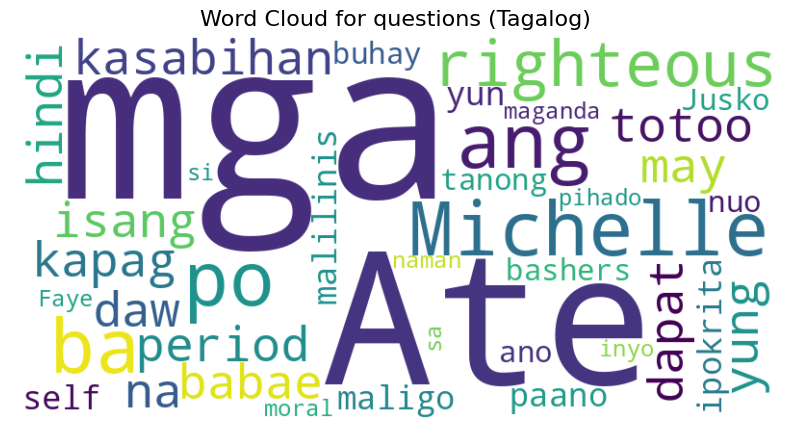

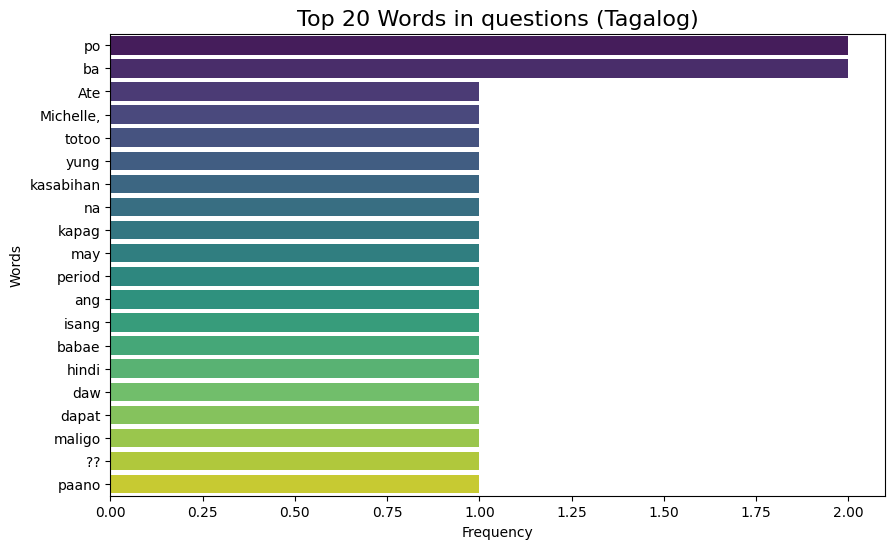

Category: questions, Language: Indonesian
Category: questions, Language: Manx
Category: questions, Language: Akan


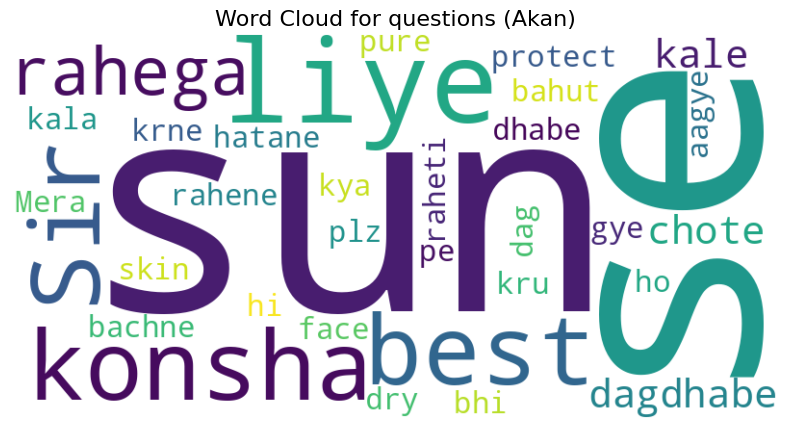

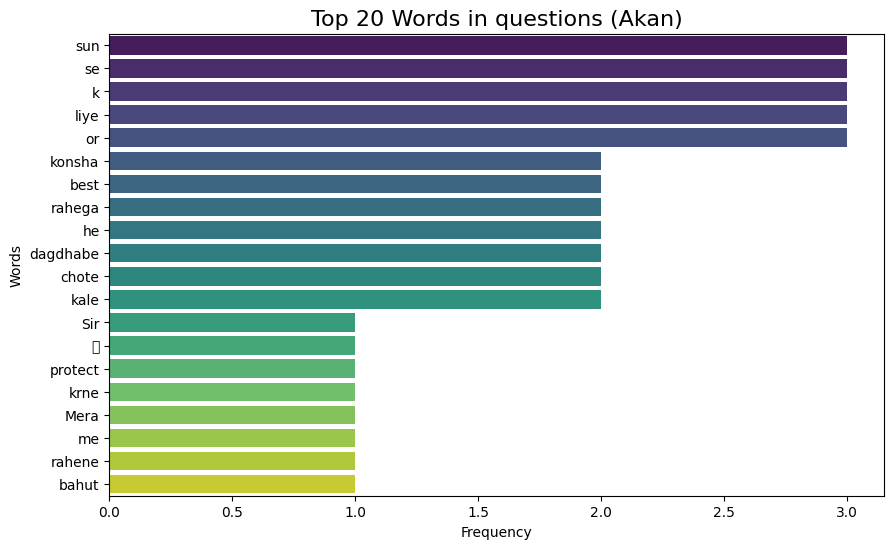

Category: questions, Language: Tamil
Category: questions, Language: Scottish Gaelic


In [21]:
def get_text_by_language_and_category(df, category, language):
    """
    Get all text data for a specific category and language.
    """
    texts = df[(df[category] == 1) & (df['language'] == language)]['text'].values
    return " ".join(texts)

# Example for generating word clouds for all languages
languagess = ['Urdu', 'Malayalam', 'Sinhala',
       'Uzbek', 'Afar', 'Persian', 'Czech', 'Southern Sotho', 'un',
       'Tagalog', 'Indonesian', 'Manx', 'Akan', 'Tamil',

              'Scottish Gaelic']  # Add detected languages here

for category in category_columns:
    for language in languagess:
        print(f"Category: {category}, Language: {language}")
        
        # Get text for this language and category
        language_category_text = get_text_by_language_and_category(df1, category, language)
        
        if language_category_text:  # Check if there is text for this combination
            # Generate Word Cloud
            generate_word_cloud(language_category_text, f"{category} ({language})")
            
            # Plot Top Words
            plot_top_words(language_category_text, f"{category} ({language})", top_n=20)


In [22]:
df1

id                                               text  \
0      500796286320  Wow! From what I've observed from this documen...   
1      838906157157  काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...   
2     1011026626743  अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...   
3     1068853499446  She's saying that "doing her own research" led...   
4      502772748919  That is not Karen, that is perfectly reasonabl...   
...             ...                                                ...   
3995   815979127763  Why not just buy some oil platforms and start ...   
3996   426508330840  अरे भाई हे तर सगळे हिंदीत बोलतात आणि राहता महा...   
3997  1016442533101  सरकार ने जी योजना आणली आहे ती खरोखरच खूप चांगल...   
3998  1096741594952  मुख्यमंत्री एकनाथ शिंदे यांच्या नेतृत्वाखाली म...   
3999  1027635577738  सद्या फडणवीस जो बोलतोय तो केंद्राच्या भरवश्याव...   

      complaint  demands  praise  questions language  comment_words  
0           0.0      0.0     1.0        0.0  English             71  
1           1.0      0.0     0.0        0.0  Marathi             53  
2           0.0      0.0     1.0        0.0  Marathi             12  
3           1.0      0.0     0.0        0.0  English             68  
4           1.0      0.0     0.0        0.0  English             67  
...         ...      ...     ...        ...      ...            ...  
3995        0.0      0.0     0.0        1.0  English             72  
3996        1.0      0.0     0.0        0.0  Marathi             23  
3997        1.0      0.0     0.0        0.0  Marathi             63  
3998        0.0      0.0     1.0        0.0  Marathi             12  
3999        1.0      0.0     0.0        0.0  Marathi             14  

[4000 rows x 8 columns]

In [ ]:
labels_remove=['Uzbek', 'Afar', 'Czech', 'Southern Sotho','Urdu','Tamil','Akan','Persian','Scottish Gaelic','Manx']

In [ ]:
df1_filtered = df1[~df1['language'].isin(labels_remove)]
df1_filtered['language'].unique()

In [73]:
!pip install indic-nlp-library


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 14.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 75.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [74]:
import string
from indicnlp.transliterate.unicode_transliterate import UnicodeIndicTransliterator
from indicnlp.tokenize import indic_tokenize


def process_english_text(text):
    """
    Preprocess English text: remove stopwords, lowercase, and strip punctuation.
    """
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower()) 
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return " ".join(tokens)


#def process_hinglish_text(text):
    """
    Preprocess Hinglish text by transliterating and cleaning it.
    """
   # try:
        #transliterated = UnicodeIndicTransliterator.transliterate(text, 'h', 'en')
       # tokens = word_tokenize(transliterated.lower())
      #  tokens = [word for word in tokens if word not in string.punctuation]
     #   return " ".join(tokens)
   # except Exception as e:
    #    return text.lower()

def process_hindi_text(text):
    """
    Preprocess Hindi text: tokenize and remove punctuations.
    """
    try:
        tokens = list(indic_tokenize.trivial_tokenize(text))
        tokens = [word for word in tokens if word not in string.punctuation]
        return " ".join(tokens)
    except Exception as e:
        return text
        
def process_marathi_text(text):
    """
    Preprocess Marathi text: tokenize and remove punctuations.
    """
    try:
        tokens = list(indic_tokenize.trivial_tokenize(text))
        tokens = [word for word in tokens if word not in string.punctuation]
        return " ".join(tokens)
    except Exception as e:
        return text
def process_minor_language_text(text):
    """
    Preprocess text in minority languages by removing punctuation and normalizing.
    """
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    return " ".join(tokens)



In [75]:
def process_text_by_language(row):
    """
    Process text based on the detected language.
    """
    lang = row['language']
    text = row['text']

    if lang == 'English':
        return process_english_text(text)
    #elif lang == 'Hinglish':
        #return process_hinglish_text(text)
    elif lang == 'Hindi':
        return process_hindi_text(text)
    elif lang == 'Marathi':
        return process_marathi_text(text)
    elif lang in ['Urdu', 'Malayalam', 'Sinhala',
       'Uzbek', 'Afar', 'Persian', 'Czech', 'Southern Sotho', 'un',
       'Tagalog', 'Indonesian', 'Manx', 'Akan', 'Tamil',
       'Scottish Gaelic']:
        return process_minor_language_text(text)
    else:
        return text  


In [76]:
import nltk


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
df1['text'] = df1.apply(process_text_by_language, axis=1)
df2['text']=df2.apply(process_text_by_language,axis=1)


In [78]:
df1

id                                               text  \
0      500796286320  wow 've observed documentary national treasure...   
1      838906157157  काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...   
2     1011026626743  अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...   
3     1068853499446  's saying `` research '' led different conclus...   
4      502772748919  karen perfectly reasonable lost 2000-3000 doll...   
...             ...                                                ...   
3995   815979127763  buy oil platforms start life extension researc...   
3996   426508330840  अरे भाई हे तर सगळे हिंदीत बोलतात आणि राहता महा...   
3997  1016442533101  सरकार ने जी योजना आणली आहे ती खरोखरच खूप चांगल...   
3998  1096741594952  मुख्यमंत्री एकनाथ शिंदे यांच्या नेतृत्वाखाली म...   
3999  1027635577738  सद्या फडणवीस जो बोलतोय तो केंद्राच्या भरवश्याव...   

      complaint  demands  praise  questions language  comment_words  
0           0.0      0.0     1.0        0.0  English             71  
1           1.0      0.0     0.0        0.0  Marathi             53  
2           0.0      0.0     1.0        0.0  Marathi             12  
3           1.0      0.0     0.0        0.0  English             68  
4           1.0      0.0     0.0        0.0  English             67  
...         ...      ...     ...        ...      ...            ...  
3995        0.0      0.0     0.0        1.0  English             72  
3996        1.0      0.0     0.0        0.0  Marathi             23  
3997        1.0      0.0     0.0        0.0  Marathi             63  
3998        0.0      0.0     1.0        0.0  Marathi             12  
3999        1.0      0.0     0.0        0.0  Marathi             14  

[4000 rows x 8 columns]

**Tokenization**

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=4000)
X = tfidf_vectorizer.fit_transform(df1['text'])
Xt = tfidf_vectorizer.fit_transform(df2['text'])


In [81]:
Xt

<2000x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 41405 stored elements in Compressed Sparse Row format>

**Embedding**

In [82]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.3 MB/s eta 0:00:00:00:01


In [84]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  
X = embedder.encode(df1['text'].tolist())
Xt = embedder.encode(df2['text'].tolist())


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [85]:
Xt

array([[-0.02387259,  0.01054687,  0.07490866, ..., -0.04728991,
         0.11848912, -0.08472491],
       [-0.1510818 , -0.08751623, -0.00253227, ..., -0.00746755,
        -0.22552069,  0.23611483],
       [ 0.10019329,  0.08091116, -0.2450392 , ..., -0.09012584,
         0.11599918, -0.08596146],
       ...,
       [-0.07959612,  0.24909398, -0.25738496, ..., -0.04638593,
         0.16655453,  0.03013413],
       [ 0.22096543,  0.4740724 , -0.31927565, ...,  0.12721002,
         0.12165609, -0.02235208],
       [-0.00760794,  0.19303125, -0.17139098, ..., -0.02523225,
        -0.07067705,  0.23984171]], dtype=float32)

In [100]:
from transformers import AutoTokenizer, AutoModel
import torch


model_name = "xlm-roberta-base"  # or "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval() 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [110]:
import numpy as np

def batch_embed(texts, tokenizer, model, batch_size=16, max_length=64):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        tokens = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )
        tokens = {key: value.to(device) for key, value in tokens.items()}
        with torch.no_grad():
            outputs = model(**tokens)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

In [106]:

train_texts = df1["text"].tolist()
test_texts = df2["text"].tolist()


In [108]:
import torch
torch.cuda.empty_cache()


In [114]:
# Assuming `train_texts` and `test_texts` contain the input text
X_train_features = batch_embed(train_texts, tokenizer, model)
X_test_features = batch_embed(test_texts, tokenizer, model)
X_train_features


array([[ 0.06035791,  0.10989931,  0.06200584, ..., -0.03763817,
         0.05179028,  0.01456974],
       [ 0.0733982 ,  0.10100936,  0.06527026, ..., -0.05827128,
         0.07354603, -0.00855191],
       [ 0.0898139 ,  0.09410654,  0.07725378, ..., -0.09033772,
         0.07805931, -0.00527629],
       ...,
       [ 0.09438761,  0.09892545,  0.07486563, ..., -0.07225802,
         0.08003153, -0.00168438],
       [ 0.11288039,  0.08313237,  0.06738286, ..., -0.07865537,
         0.06372809, -0.01444861],
       [ 0.08783382,  0.09888034,  0.06092849, ..., -0.07128768,
         0.05562294,  0.00994204]], dtype=float32)

In [112]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_features, df1[['praise', 'complaint', 'demands', 'questions']], test_size=0.2, random_state=42)

In [116]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Prepare storage for predictions and scores
y_pred = {}
auc_scores = {}

# Train and evaluate for each label independently
for col in ['complaint', 'demands', 'praise', 'questions']:
    # Prepare data for the current label
    dtrain = xgb.DMatrix(X1_train, label=y1_train[col])
    dtest = xgb.DMatrix(X1_test)
    
    # Define XGBoost parameters
    params = {
        'objective': 'binary:logistic',  # Binary classification
        'eval_metric': 'auc',           # AUC for evaluation
        'learning_rate': 0.1,
        'max_depth': 5,
        'subsample': 0.8
    }
    
    # Train the model
    xgb_model= xgb.train(params, dtrain, num_boost_round=450)
    
    # Predict probabilities for the positive class
    preds = xgb_model.predict(dtest)
    y_pred[col] = preds
    
    # Compute AUC-ROC score
    auc_scores[col] = roc_auc_score(y_test[col], preds)

# Print the AUC-ROC scores for each column
print("AUC Scores:", auc_scores)






AUC Scores: {'complaint': 0.8351503700204692, 'demands': 0.7642951251646903, 'praise': 0.9197867255010113, 'questions': 0.7721354166666667}


In [49]:
y_predd={}
aucc_scores={}
dtes = xgb.DMatrix(Xt)
pred= xgb_model.predict(dtes)
y_predd[col]=pred







In [50]:
y_predd

{'questions': array([3.3852506e-05, 7.2678509e-03, 6.0905266e-05, ..., 7.2199304e-04,
        1.0177585e-02, 4.7241198e-04], dtype=float32)}

In [52]:
submission = pd.DataFrame({
    'id': df2['id'],
    #/'complaint': y_predd['complaint'],
    #'demands': y_predd['demands'],
    #'praise': y_predd['praise'],
    'questions': y_predd['questions']
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

In [16]:
pip install transformers datasets torch scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [143]:
from transformers import DistilBertTokenizer
from sklearn.model_selection import train_test_split
import torch


tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')


def tokenize_data(texts, max_length=128):
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )


X_train, X_test, y_train, y_test = train_test_split(
    df1['text'], df1[['complaint', 'demands', 'praise', 'questions']],
    test_size=0.2,
    random_state=42
)


train_tokens = tokenize_data(X_train)
test_tokens = tokenize_data(X_test)


y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [144]:
from transformers import DistilBertModel
import torch.nn as nn

class DistilBERTMultiLabel(nn.Module):
    def __init__(self, num_labels):
        super(DistilBERTMultiLabel, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')
        self.classifier = nn.Sequential(
            nn.Linear(self.distilbert.config.hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_labels),
            nn.Sigmoid()  
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0, :]  # CLS token representation
        logits = self.classifier(hidden_state)
        return logits


model = DistilBERTMultiLabel(num_labels=4)


In [147]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW
from torch.optim import lr_scheduler

# Prepare data loaders
train_data = TensorDataset(
    train_tokens['input_ids'], train_tokens['attention_mask'], y_train_tensor
)
test_data = TensorDataset(
    test_tokens['input_ids'], test_tokens['attention_mask'], y_test_tensor
)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Loss function
criterion = nn.BCELoss()  # Binary cross-entropy for multi-label
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [146]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [141]:
from tqdm import tqdm

num_epochs = 4
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    print(f"Epoch {epoch + 1}, Training Loss: {train_loss / len(train_loader)}")
    scheduler.step()


Epoch 1:   0%|          | 0/200 [00:00<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [131]:
from sklearn.metrics import roc_auc_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask)
        all_preds.append(outputs.cpu())
        all_labels.append(labels.cpu())

all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

# Calculate AUC-ROC for each label
auc_scores = {}
for i, col in enumerate(['complaint', 'demands', 'praise', 'questions']):
    auc_scores[col] = roc_auc_score(all_labels[:, i], all_preds[:, i])

print("AUC Scores:", auc_scores)


AUC Scores: {'complaint': 0.7940103920642418, 'demands': 0.7724769433465084, 'praise': 0.8800478029049458, 'questions': 0.7480729166666668}


In [24]:
# Predict on test data
test_tokens = tokenize_data(df2['text'])
test_inputs = {
    'input_ids': test_tokens['input_ids'].to(device),
    'attention_mask': test_tokens['attention_mask'].to(device)
}

with torch.no_grad():
    test_preds = model(**test_inputs).cpu().numpy()

# Create submission file
submission = pd.DataFrame({
    'id': df2['id'],
    'complaint': test_preds[:, 0],
    'demands': test_preds[:, 1],
    'praise': test_preds[:, 2],
    'questions': test_preds[:, 3]
})

submission.to_csv('submission.csv', index=False)


In [26]:
dd=pd.read_csv("/kaggle/working/submission.csv")
dd

id  complaint   demands    praise  questions
0     1041016773991   0.865905  0.061408  0.084127   0.044429
1      109362481297   0.018079  0.023948  0.964531   0.013776
2      985019053532   0.452346  0.411566  0.086751   0.035033
3      436629695381   0.796080  0.051867  0.047131   0.115036
4      585196067684   0.273857  0.785827  0.075823   0.063157
...             ...        ...       ...       ...        ...
1995   148770317688   0.847340  0.095973  0.070919   0.030861
1996   288582831883   0.020640  0.141857  0.878158   0.012628
1997   285086247879   0.020087  0.018804  0.969933   0.015622
1998   114758927004   0.557469  0.103915  0.037347   0.251822
1999   417819392797   0.025017  0.016125  0.969255   0.013191

[2000 rows x 5 columns]